## ANALYSIS OF AN IMAGE SEQUENCE AFTER DATA GENERATION USING THE CALCIUM CHARACTERIZATION PIPELINE

### Initialization

In [1]:
# Libraries
import seaborn as sns
import numpy as np
from pathlib import Path
import sys

# Add /Source to sys.path if not already present
project_root = Path.cwd().parent
source_path = project_root / "src"

if source_path.exists() and str(source_path) not in sys.path:
    sys.path.insert(0, str(source_path))

# Utility functions
from calcium_activity_characterization.analysis.visualizers import (
    plot_histogram_by_dataset, 
    plot_pie_chart_by_dataset, 
    plot_raster,
    plot_bar_by_dataset,
    plot_histogram_by_group
    )
from calcium_activity_characterization.analysis.loaders import load_and_merge_datasets
from calcium_activity_characterization.analysis.statistics import analyze_peak_intervals

sns.set(style="whitegrid")

# Define paths to control datasets
control_paths = {
    "20250326 - IS1": "D:/Mateo/20250326/Output/IS1"
}

# Load and merge datasets
peaks = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/peaks.csv")
cells = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/cells.csv")
events = load_and_merge_datasets(control_paths=control_paths, file_name="datasets/events.csv")

### Binary & Heatmap Raster Plot

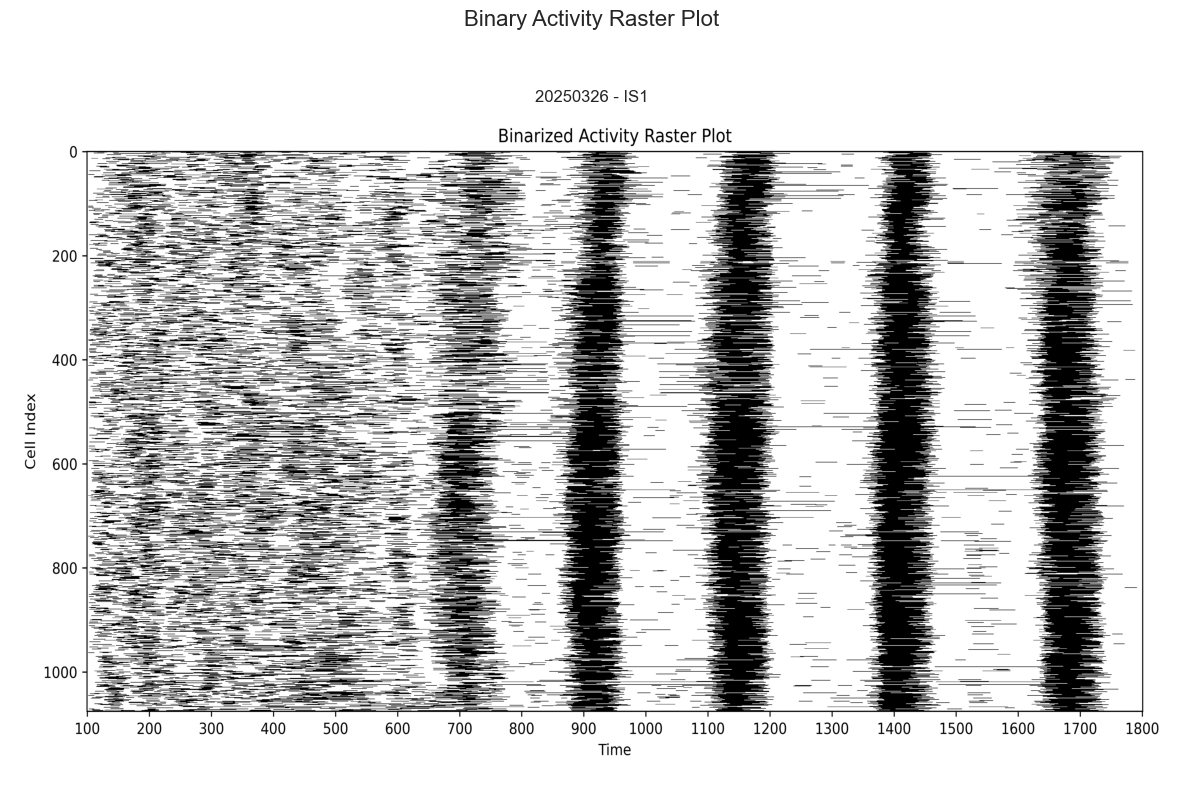

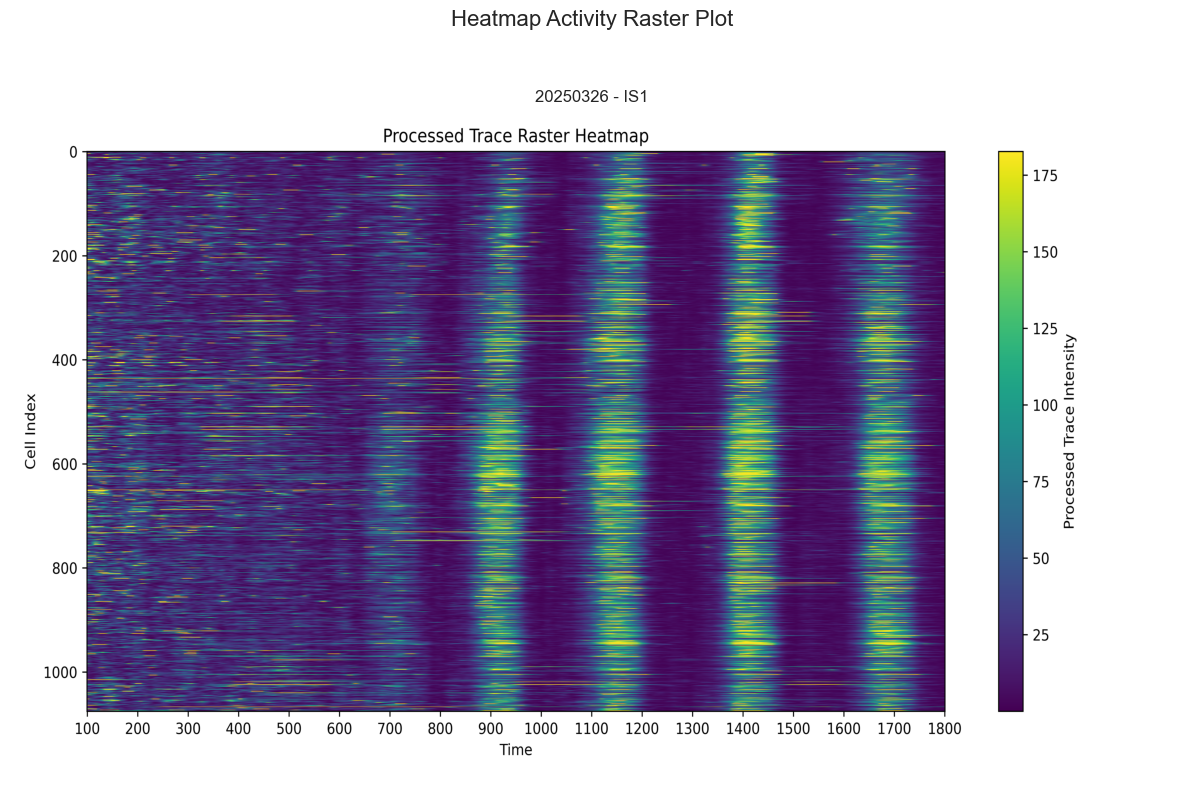

In [2]:
plot_raster(
    dataset_paths=control_paths,
    image_name="signal-processing/raster_plot.png",
    title="Binary Activity Raster Plot",
    n_cols=1,
    figsize_per_plot=(12, 8)
)
plot_raster(
    dataset_paths=control_paths,
    image_name="signal-processing/heatmap_raster.png",
    title="Heatmap Activity Raster Plot",
    n_cols=1,
    figsize_per_plot=(12, 8)
)

### Peaks population

In [3]:
print(f"Total number of peaks: {len(peaks)}")
print(f"Total number of cells: {len(cells)}")

Total number of peaks: 12046
Total number of cells: 1076


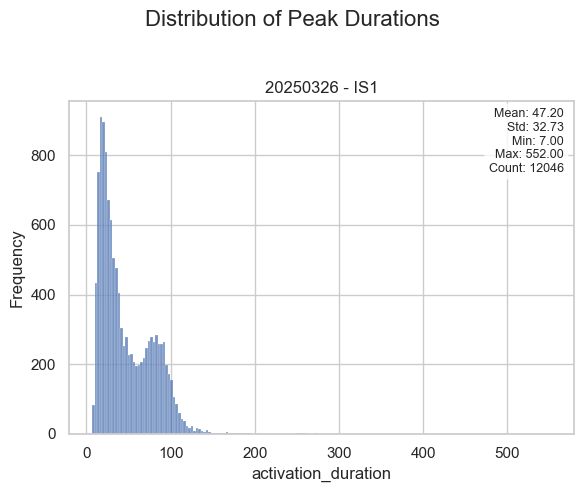

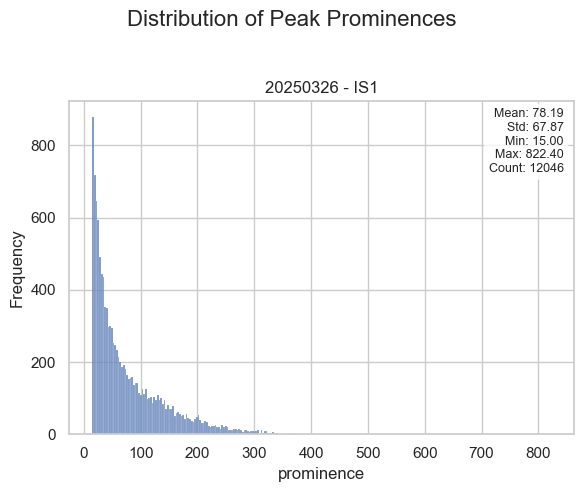

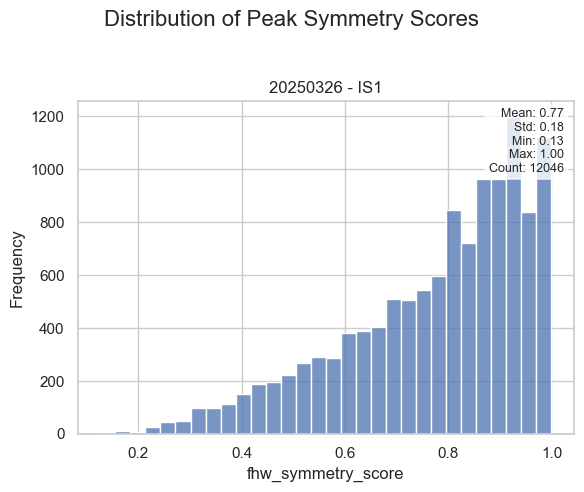

In [4]:
plot_histogram_by_dataset(
    df=peaks,
    column="activation_duration",
    title="Distribution of Peak Durations",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=peaks,
    column="prominence",
    title="Distribution of Peak Prominences",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=peaks,
    column="fhw_symmetry_score",
    title="Distribution of Peak Symmetry Scores",
    bin_count=30,
    n_cols=1,
)

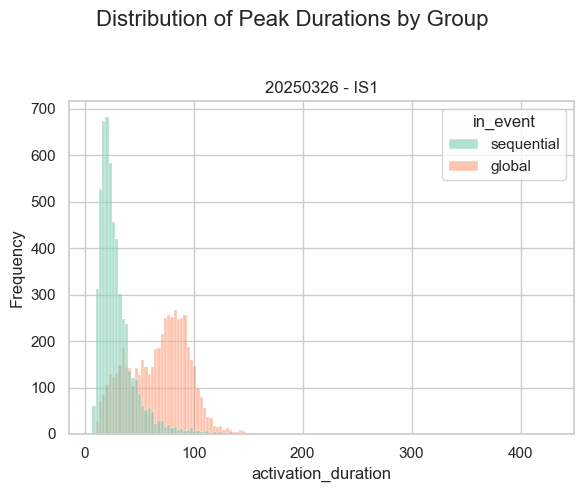

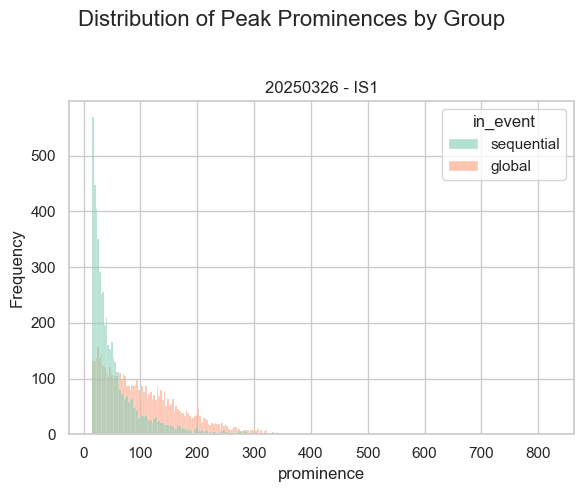

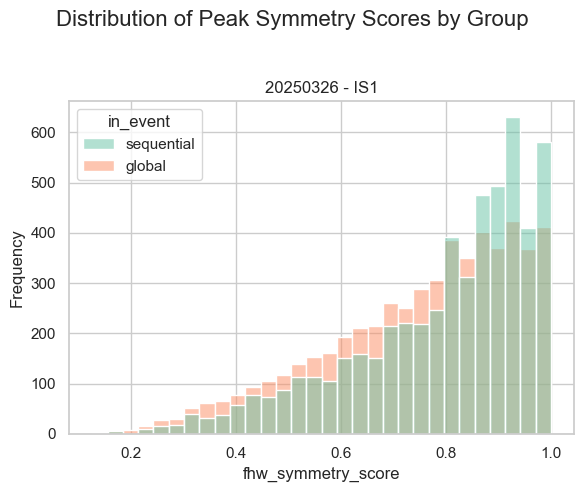

In [5]:
plot_histogram_by_group(
    df=peaks,
    value_column="activation_duration",
    group_column="in_event",
    title="Distribution of Peak Durations by Group",
    bin_width=3,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=peaks,
    value_column="prominence",
    group_column="in_event",
    title="Distribution of Peak Prominences by Group",
    bin_width=3,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=peaks,
    value_column="fhw_symmetry_score",
    group_column="in_event",
    title="Distribution of Peak Symmetry Scores by Group",
    bin_count=30,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)

### Categorized these peaks into different types of events

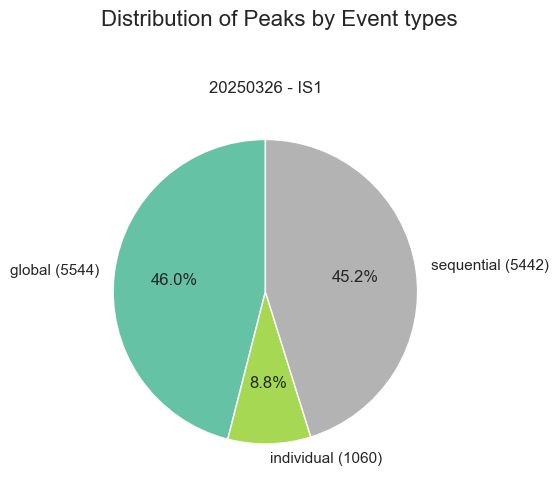

In [6]:
peaks["in_event"] = peaks["in_event"].fillna("individual")

plot_pie_chart_by_dataset(
    df=peaks,
    column="in_event",
    title="Distribution of Peaks by Event types",
    n_cols=1,
    palette="Set2"
)

## GLOBAL EVENTS
### Peaks in global events

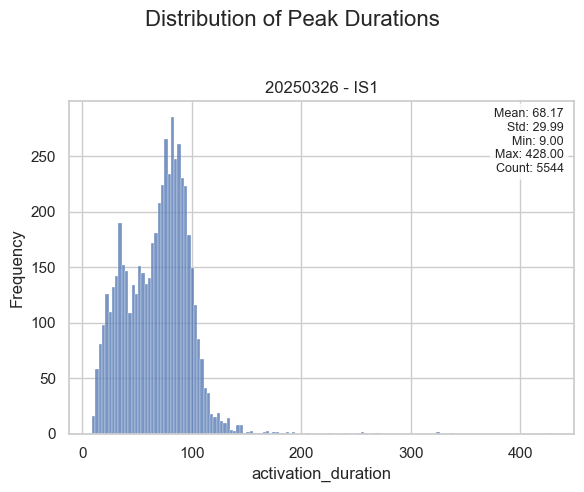

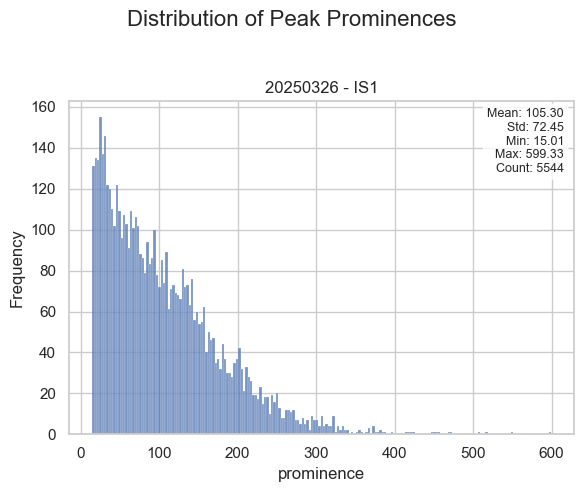

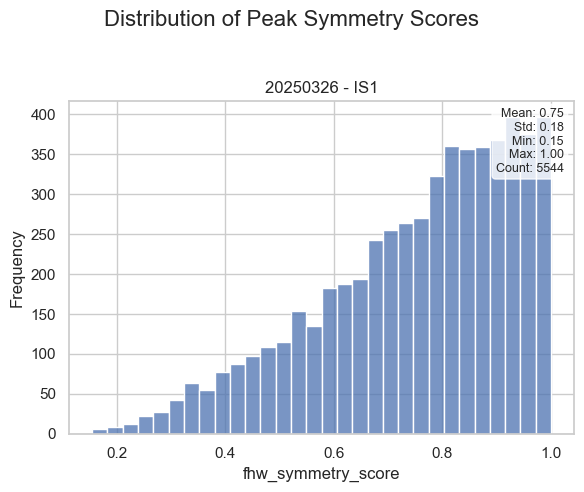

In [7]:
subset_peaks_in_global_events = peaks[peaks["in_event"] == "global"]
plot_histogram_by_dataset(
    df=subset_peaks_in_global_events,
    column="activation_duration",
    title="Distribution of Peak Durations",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=subset_peaks_in_global_events,
    column="prominence",
    title="Distribution of Peak Prominences",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=subset_peaks_in_global_events,
    column="fhw_symmetry_score",
    title="Distribution of Peak Symmetry Scores",
    bin_count=30,
    n_cols=1,
)

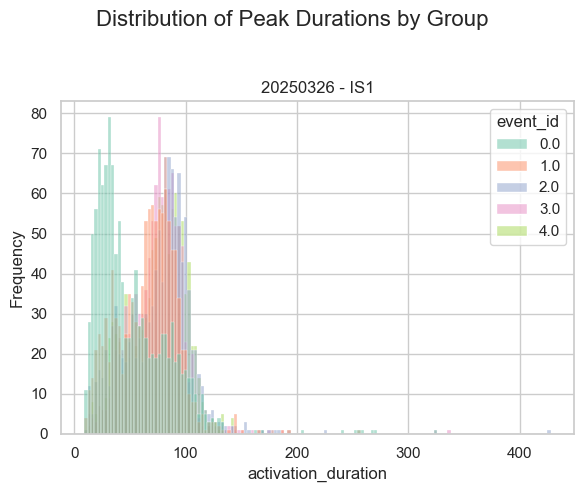

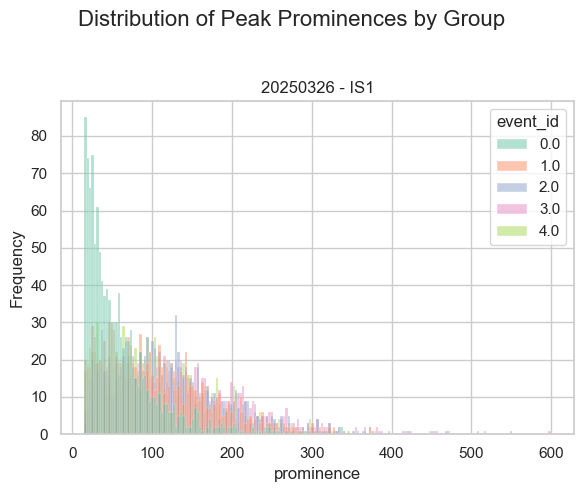

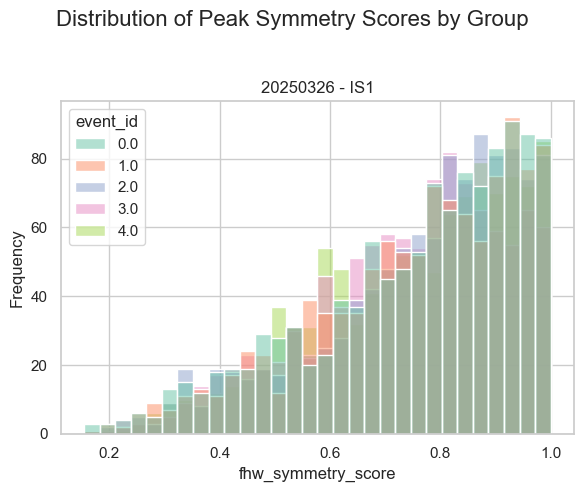

In [8]:
plot_histogram_by_group(
    df=subset_peaks_in_global_events,
    value_column="activation_duration",
    group_column="event_id",
    title="Distribution of Peak Durations by Group",
    bin_width=3,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=subset_peaks_in_global_events,
    value_column="prominence",
    group_column="event_id",
    title="Distribution of Peak Prominences by Group",
    bin_width=3,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)
plot_histogram_by_group(
    df=subset_peaks_in_global_events,
    value_column="fhw_symmetry_score",
    group_column="event_id",
    title="Distribution of Peak Symmetry Scores by Group",
    bin_count=30,
    n_cols=1,
    multiple="layer",
    palette="Set2"
)

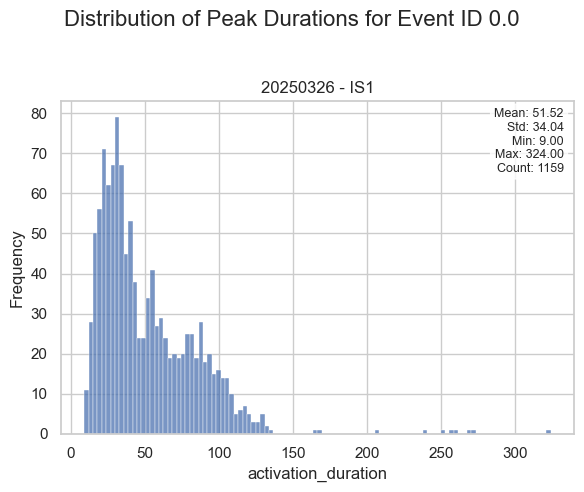

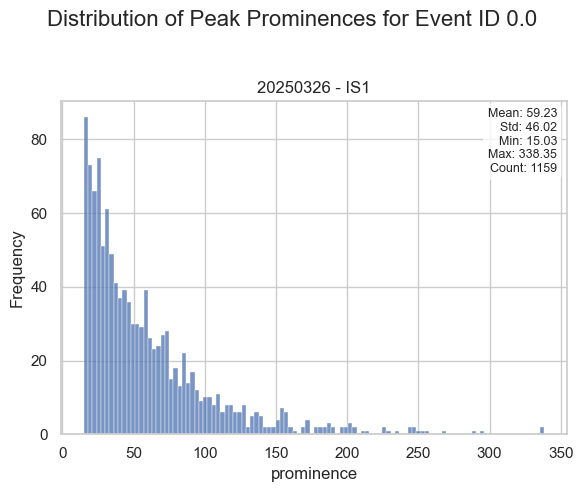

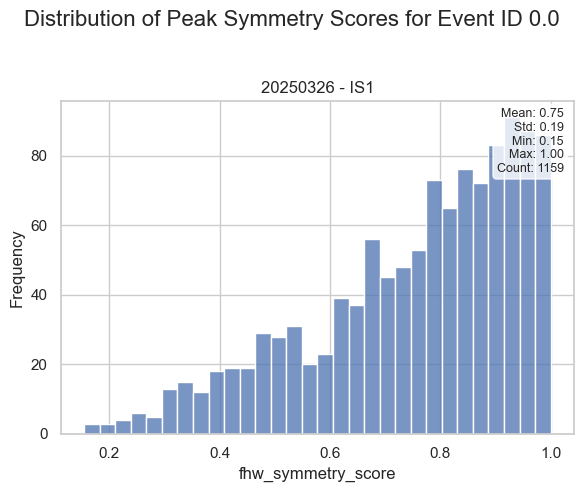

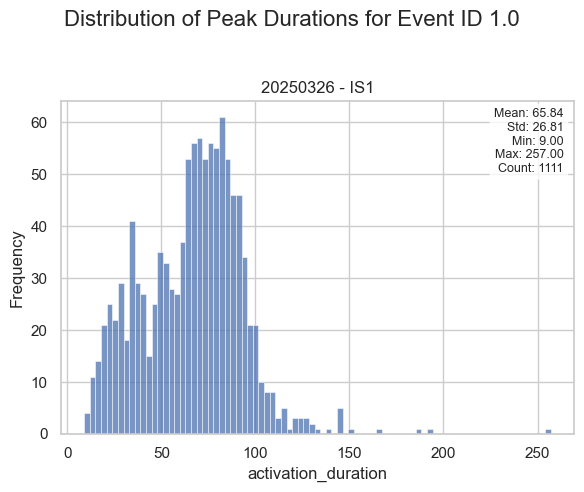

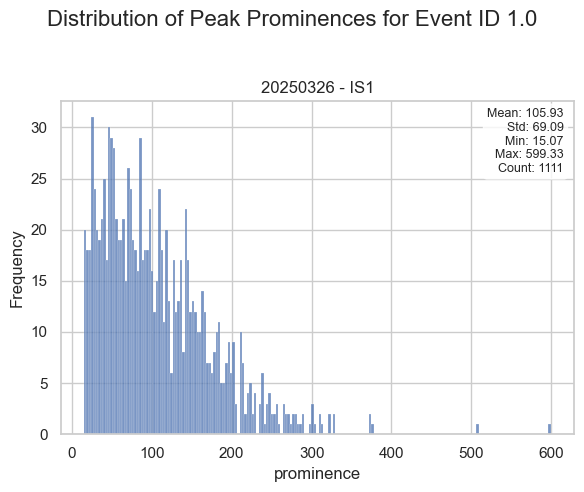

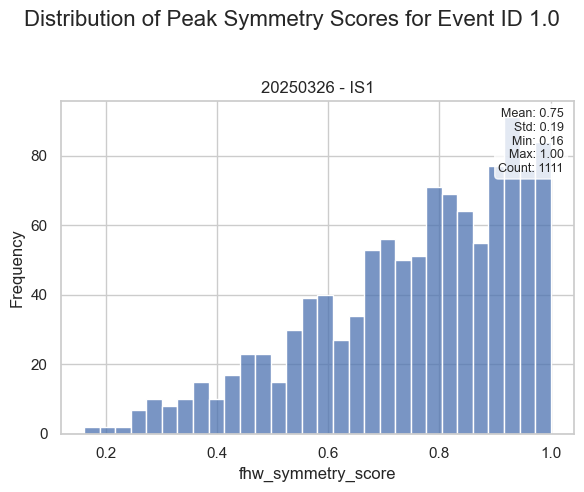

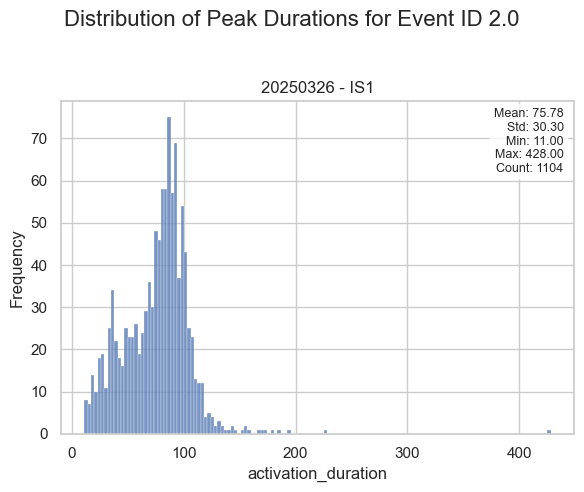

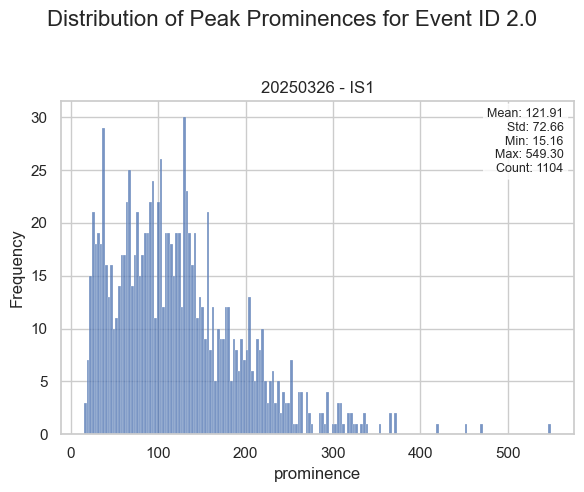

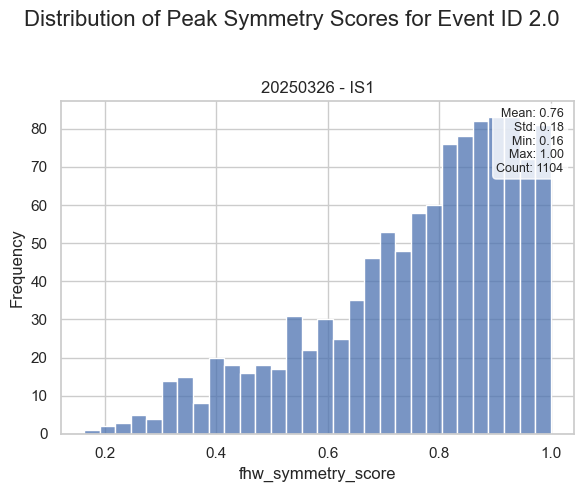

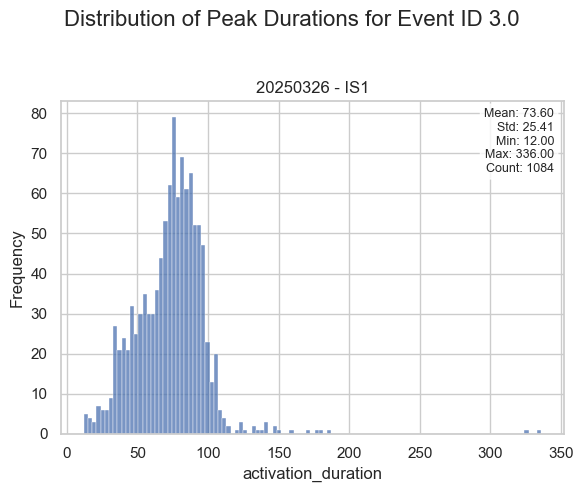

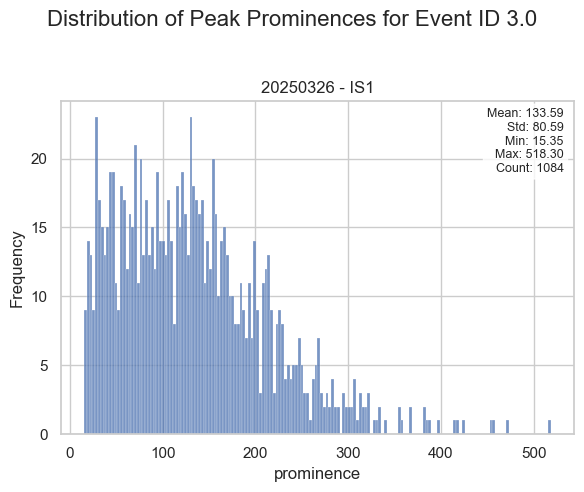

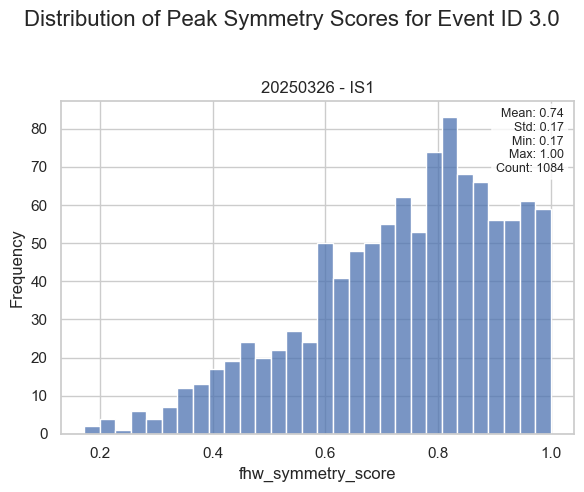

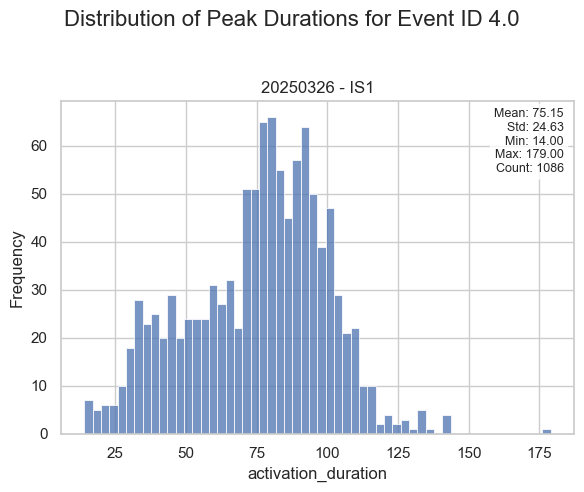

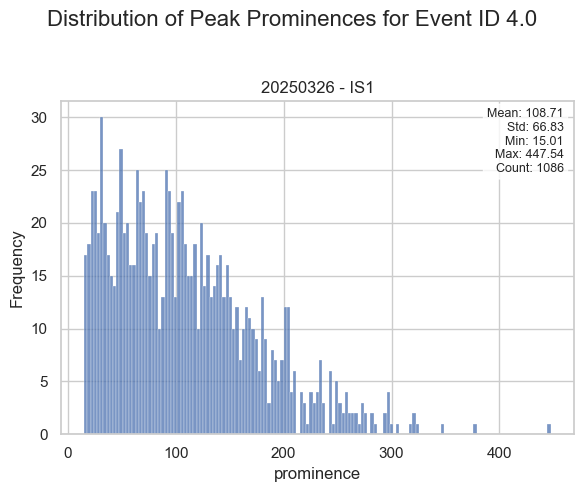

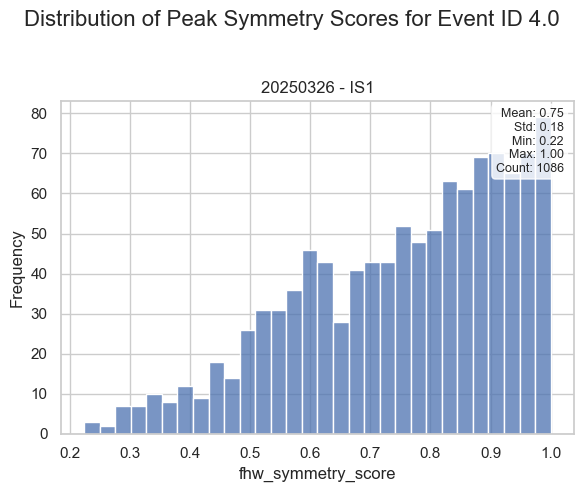

In [9]:
for i, event_id in enumerate(subset_peaks_in_global_events["event_id"].unique()):
    subset = subset_peaks_in_global_events[subset_peaks_in_global_events["event_id"] == event_id]
    if len(subset) > 0:
        plot_histogram_by_dataset(
            df=subset,
            column="activation_duration",
            title=f"Distribution of Peak Durations for Event ID {event_id}",
            bin_width=3,
            n_cols=1,
        )
        plot_histogram_by_dataset(
            df=subset,
            column="prominence",
            title=f"Distribution of Peak Prominences for Event ID {event_id}",
            bin_width=3,
            n_cols=1,
        )
        plot_histogram_by_dataset(
            df=subset,
            column="fhw_symmetry_score",
            title=f"Distribution of Peak Symmetry Scores for Event ID {event_id}",
            bin_count=30,
            n_cols=1,
        )

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=axis_column, y=value_column, hue=hue_column, dodge=False, palette=palette, legend=False)


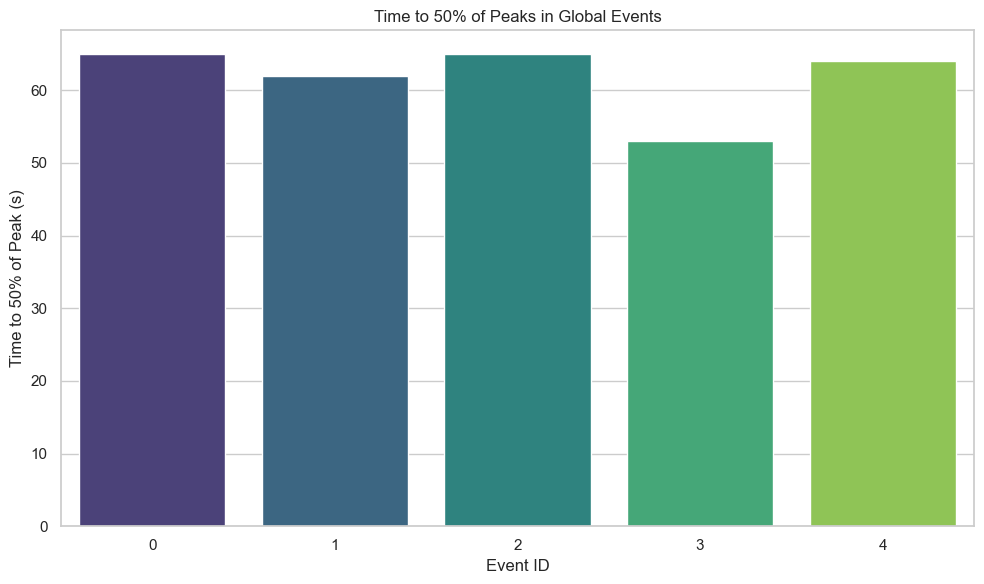

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=axis_column, y=value_column, hue=hue_column, dodge=False, palette=palette, legend=False)


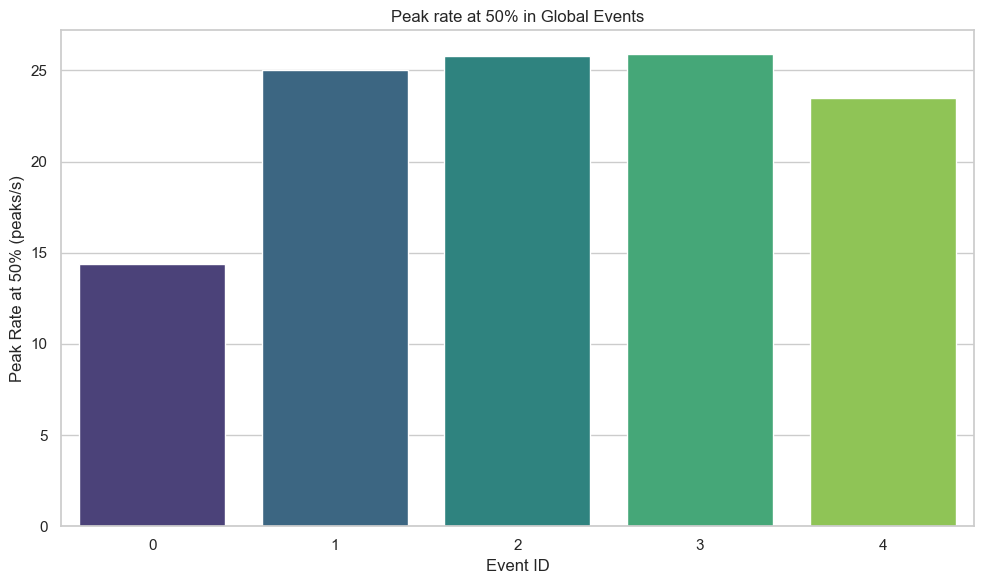

In [10]:
global_events = events[events["event_type"] == "GlobalEvent"]

plot_bar_by_dataset(
    df=global_events,
    axis_column="event_id",
    value_column="time_to_50",
    title="Time to 50% of Peaks in Global Events",
    ylabel="Time to 50% of Peak (s)",
    xlabel="Event ID",
    rotation=0
)
plot_bar_by_dataset(
    df=global_events,
    axis_column="event_id",
    value_column="peak_rate_at_50",
    title="Peak rate at 50% in Global Events",
    ylabel="Peak Rate at 50% (peaks/s)",
    xlabel="Event ID",
    rotation=0
)

c:\Users\poseidon\OneDrive\Documents\01_ETHZ\Master_Degree\Spring_Semester_2025\Master_Thesis\Coding\Image_analysis\src\calcium_activity_characterization\analysis\visualizers.py:243: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x=axis_column, y=value_column, hue=hue_column, dodge=False, palette=palette, legend=False)


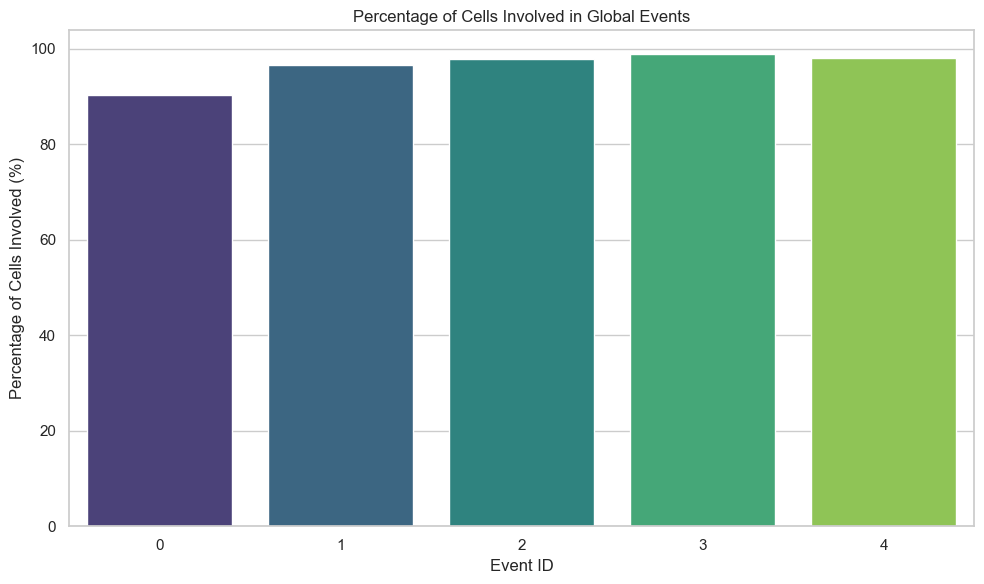

In [11]:
global_events = events[events["event_type"] == "GlobalEvent"].copy()
global_events["percent_cells_involved"] = 100 * global_events["n_cells_involved"] / len(cells)

plot_bar_by_dataset(
    df=global_events,
    axis_column="event_id",
    value_column="percent_cells_involved",
    title="Percentage of Cells Involved in Global Events",
    ylabel="Percentage of Cells Involved (%)",
    xlabel="Event ID",
    rotation=0
)

In [12]:
global_event_peak_times = events[events["event_type"] == "GlobalEvent"]["event_peak_time"].tolist()

intervals, periodicity, frequency = analyze_peak_intervals(global_event_peak_times)

print(f"Intervals between global event peaks: {intervals}")

if periodicity is not None:
    print(f"Estimated periodicity: {periodicity:.3f}")

if periodicity is not None and periodicity > 0.8:
    print("The global events exhibit a regular periodic pattern.")
    print(f"Estimated frequency (1/mean interval): {frequency:.3f} events per frame")

Intervals between global event peaks: [209.0, 228.0, 260.0, 266.0]
Estimated periodicity: 0.912
The global events exhibit a regular periodic pattern.
Estimated frequency (1/mean interval): 0.004 events per frame


## SEQUENTIAL EVENTS

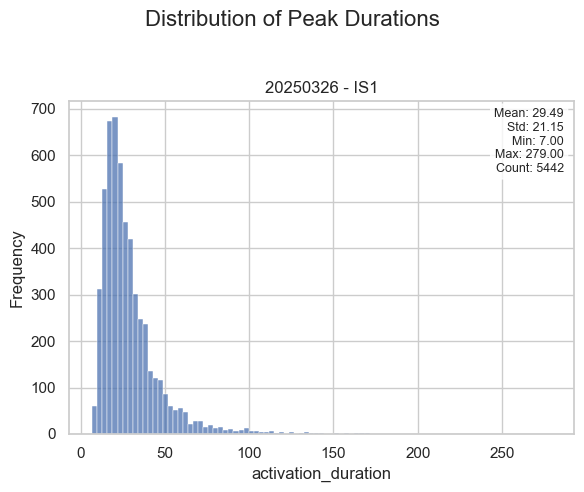

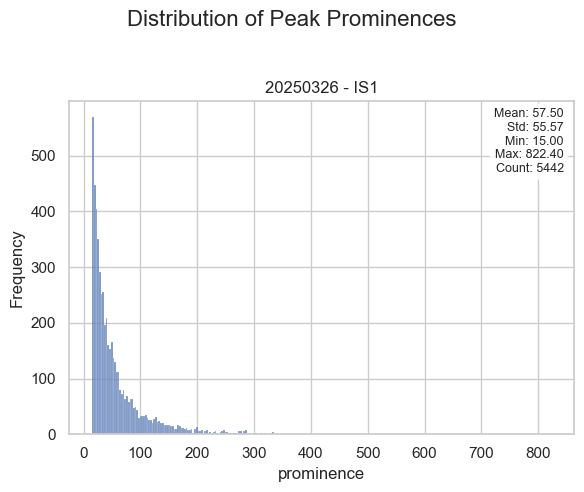

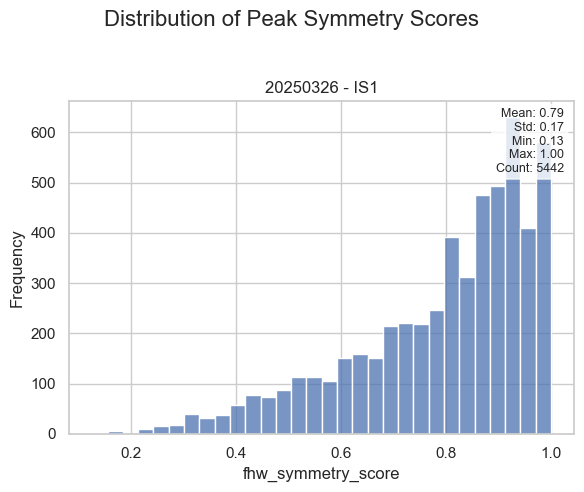

In [13]:
subset_peaks_in_sequential_events = peaks[peaks["in_event"] == "sequential"]
plot_histogram_by_dataset(
    df=subset_peaks_in_sequential_events,
    column="activation_duration",
    title="Distribution of Peak Durations",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=subset_peaks_in_sequential_events,
    column="prominence",
    title="Distribution of Peak Prominences",
    bin_width=3,
    n_cols=1,
)
plot_histogram_by_dataset(
    df=subset_peaks_in_sequential_events,
    column="fhw_symmetry_score",
    title="Distribution of Peak Symmetry Scores",
    bin_count=30,
    n_cols=1,
)

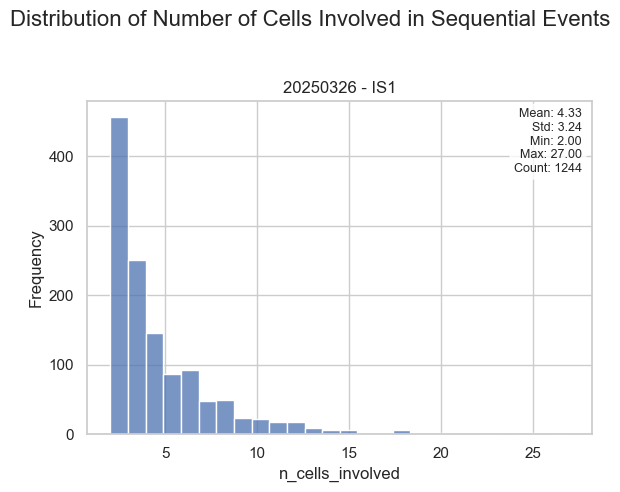

Disclaimer: this is the mean not the distribution of the communication speed between 2 cells.


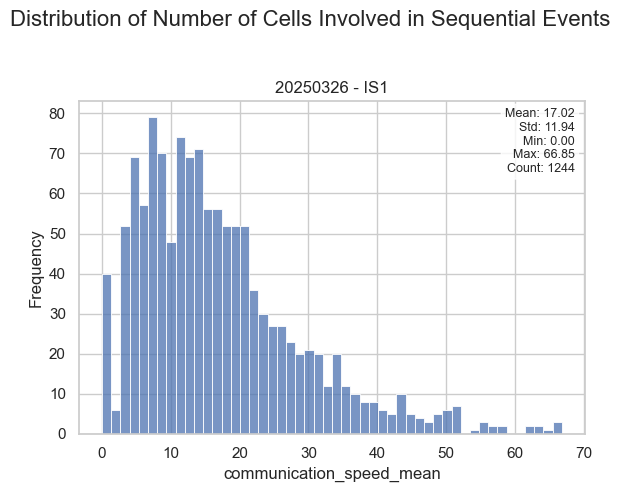

In [ ]:
sequential_events = events[events["event_type"] == "SequentialEvent"]
plot_histogram_by_dataset(
    df=sequential_events,
    column="n_cells_involved",
    title="Distribution of Number of Cells Involved in Sequential Events",
    bin_width=1,
    n_cols=1
)
print("Disclaimer: this is the mean not the distribution of the communication speed between 2 cells.")
plot_histogram_by_dataset(
    df=sequential_events,
    column="communication_speed_mean",
    title="D",
    bin_count=50,
    n_cols=1
)

### SEQUENTIAL CORRELATION BETWEEN CELLS

In [21]:
# Count number of peaks labeled as 'origin' of a 'sequential' event for each cell
origin_sequential_counts = peaks[
    (peaks["origin_type"] == "origin") & (peaks["in_event"] == "sequential")
].groupby("cell_id").size()

cells["num_origin_sequential_peaks"] = cells["cell_id"].map(origin_sequential_counts).fillna(0).astype(int)

cells.sort_values("num_origin_sequential_peaks", ascending=False).head(30)

,cell_id,centroid_x,centroid_y,num_peaks,is_active,peak_frequency,periodicity_score,dataset,num_origin_sequential_peaks
1045,1161,912,1468,21,True,0.012346,0.533367,20250326 - IS1,6
361,419,35,547,19,True,0.011170,0.539728,20250326 - IS1,5
481,548,1226,722,12,True,0.007055,0.634038,20250326 - IS1,5
216,254,1134,330,14,True,0.008230,0.604085,20250326 - IS1,5
645,728,595,946,13,True,0.007643,0.627564,20250326 - IS1,5
162,198,152,256,14,True,0.008230,0.598979,20250326 - IS1,5
841,941,863,1204,16,True,0.009406,0.529231,20250326 - IS1,5
214,251,1290,328,25,True,0.014697,0.692654,20250326 - IS1,5
439,501,445,659,14,True,0.008230,0.617503,20250326 - IS1,4
206,243,154,325,13,True,0.007643,0.628893,20250326 - IS1,4


In [22]:
cells["origin_sequential_peak_ratio"] = cells["num_origin_sequential_peaks"] / cells["num_peaks"]

cells.sort_values("origin_sequential_peak_ratio", ascending=False).head(30)

,cell_id,centroid_x,centroid_y,num_peaks,is_active,peak_frequency,periodicity_score,dataset,num_origin_sequential_peaks,origin_sequential_peak_ratio
481,548,1226,722,12,True,0.007055,0.634038,20250326 - IS1,5,0.416667
915,1020,37,1295,10,True,0.005879,0.645372,20250326 - IS1,4,0.400000
645,728,595,946,13,True,0.007643,0.627564,20250326 - IS1,5,0.384615
164,200,565,262,11,True,0.006467,0.673758,20250326 - IS1,4,0.363636
10,36,1001,36,11,True,0.006467,0.636545,20250326 - IS1,4,0.363636
730,817,1005,1060,11,True,0.006467,0.639033,20250326 - IS1,4,0.363636
216,254,1134,330,14,True,0.008230,0.604085,20250326 - IS1,5,0.357143
162,198,152,256,14,True,0.008230,0.598979,20250326 - IS1,5,0.357143
872,975,1363,1244,9,True,0.005291,0.679283,20250326 - IS1,3,0.333333
204,241,366,319,12,True,0.007055,0.630808,20250326 - IS1,4,0.333333


In [23]:
individual_peaks_counts = peaks[peaks["in_event"] == "individual"].groupby("cell_id").size()
cells["num_individual_peaks"] = cells["cell_id"].map(individual_peaks_counts).fillna(0).astype(int)
cells["individual_peaks_ratio"] = cells["num_individual_peaks"] / cells["num_peaks"]

cells.sort_values("individual_peaks_ratio", ascending=False).head(30)

,cell_id,centroid_x,centroid_y,num_peaks,is_active,peak_frequency,periodicity_score,dataset,num_origin_sequential_peaks,origin_sequential_peak_ratio,num_individual_peaks,individual_peaks_ratio
1067,1183,658,1505,5,True,0.002939,0.552008,20250326 - IS1,0,0.000000,3,0.600000
275,321,343,418,7,True,0.004115,0.660201,20250326 - IS1,0,0.000000,4,0.571429
1074,1190,1044,1516,13,True,0.007643,0.608284,20250326 - IS1,1,0.076923,6,0.461538
380,440,1192,565,7,True,0.004115,0.765156,20250326 - IS1,1,0.142857,3,0.428571
19,45,1472,48,12,True,0.007055,0.610071,20250326 - IS1,1,0.083333,5,0.416667
1060,1176,1480,1494,10,True,0.005879,0.636883,20250326 - IS1,1,0.100000,4,0.400000
72,101,1294,130,10,True,0.005879,0.683056,20250326 - IS1,0,0.000000,4,0.400000
177,213,44,278,20,True,0.011758,0.536947,20250326 - IS1,2,0.100000,8,0.400000
1059,1175,865,1495,13,True,0.007643,0.657842,20250326 - IS1,0,0.000000,5,0.384615
301,349,1062,457,8,True,0.004703,0.663087,20250326 - IS1,0,0.000000,3,0.375000
